# Basic charts in pandas

### documentation

> https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html

> https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.hist.html

> Source (pubs): https://www.ons.gov.uk/businessindustryandtrade/business/activitysizeandlocation/datasets/publichousesandbarsbylocalauthority

> Source (population): https://statswales.gov.wales/Catalogue/Population-and-Migration/Population/Estimates/Local-Authority/populationestimates-by-localauthority-year

> plots available in pandas


        ‘line’ : line plot (default)
        ‘bar’ : vertical bar plot
        ‘barh’ : horizontal bar plot
        ‘hist’ : histogram
        ‘box’ : boxplot
        ‘kde’ : Kernel Density Estimation plot
        ‘density’ : same as ‘kde’
        ‘area’ : area plot
        ‘pie’ : pie plot
        ‘scatter’ : scatter plot
        ‘hexbin’ : hexbin plot



In [1]:
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
# import population data in Wales for 2001, 2018

path = '/Users/aidanair/Documents/DATA/ALL_DATASETS/'
file = 'wales_population.csv'

pop = pd.read_csv(path + file)


In [3]:
pop[:3]

,area,pop_one,pop_eighteen
0,Isle of Anglesey,"67,806","69,961"
1,Gwynedd,"116,844","124,178"
2,Conwy,"109,674","117,181"


In [4]:
# check data types 

pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   area          22 non-null     object
 1   pop_one       22 non-null     object
 2   pop_eighteen  22 non-null     object
dtypes: object(3)
memory usage: 656.0+ bytes


In [5]:
# fix integers

# remove the ,
pop = pop.replace(',','', regex = True)

# cast population columns to integers
pop.pop_one = pop.pop_one.astype(int)
pop.pop_eighteen = pop.pop_eighteen.astype(int)

In [6]:
# check datatypes again

print(pop.info())
pop[:3]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   area          22 non-null     object
 1   pop_one       22 non-null     int64 
 2   pop_eighteen  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 656.0+ bytes
None


,area,pop_one,pop_eighteen
0,Isle of Anglesey,67806,69961
1,Gwynedd,116844,124178
2,Conwy,109674,117181


## Bar chart

In [7]:
# use area names column as index (instead of row numbers) - this will label the x axis

pop.set_index('area', inplace=True)

In [8]:
pop.head()

,pop_one,pop_eighteen
area,,
Isle of Anglesey,67806,69961
Gwynedd,116844,124178
Conwy,109674,117181
Denbighshire,93070,95330
Flintshire,148629,155593


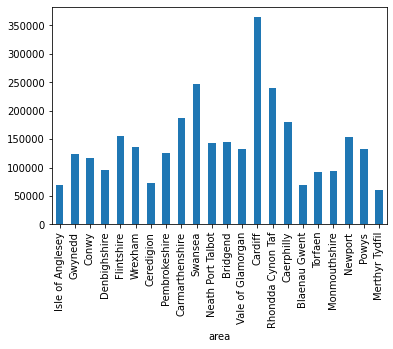

In [9]:
# bar chart

pop.pop_eighteen.plot(kind = 'bar')

# this works a placeholder 'do nothing' but here stops the <AxesSubplot:title ETC. A semicolon also works
pass

<br><br><br>

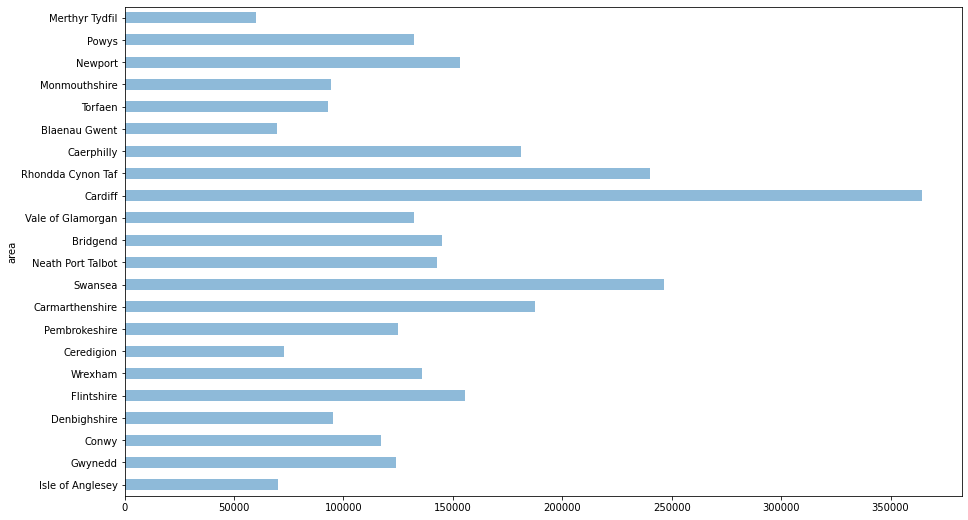

In [12]:
# # horizontal bar chart, with adjusted opacity, title and figure size

pop.pop_eighteen.plot(kind = 'barh', alpha = 0.5, figsize=(15,9));

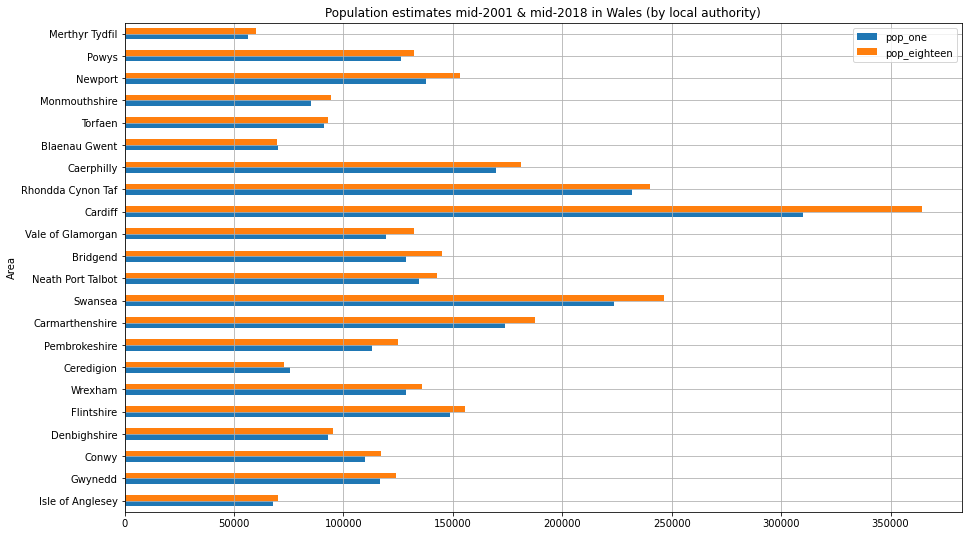

In [13]:
# stacked barchart with title, grid and labels

pop[['pop_one','pop_eighteen']].plot(kind = 'barh', 
                                     figsize=(15,9),
                                     title = 'Population estimates mid-2001 & mid-2018 in Wales (by local authority)',
                                     grid = True,
                                     stacked = False,
                                     xlabel = 'Area', 
                                     ylabel = 'Population');

<br><br>
## Linechart

> using numbers of pubs in Wales by local authority 2001-18

In [14]:
path = '/Users/aidanair/Documents/DATA/ALL_DATASETS/'
file = 'wales_pubs_area_2001_18.csv'

# give the df a variable name 'years'
years = pd.read_csv(path + file)

In [15]:
years[:2]

,code,area,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,W06000001,Isle of Anglesey,75,85,90,85,85,90,90,80,80,75,70,75,55,60,60,60,60,60
1,W06000002,Gwynedd,135,135,145,145,135,145,150,160,150,135,130,140,140,140,125,120,120,120


In [16]:
# delete the 'code' column

del years['code']

In [17]:
# set the area name as the index

years = years.set_index('area')

In [18]:
years[:2]

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
area,,,,,,,,,,,,,,,,,,
Isle of Anglesey,75,85,90,85,85,90,90,80,80,75,70,75,55,60,60,60,60,60
Gwynedd,135,135,145,145,135,145,150,160,150,135,130,140,140,140,125,120,120,120


In [19]:
# transpose to set the years as the y axis and rename the vertical axis as 'year'

years = years.transpose().rename_axis('year', axis=1)

In [20]:
years[:2]

year,Isle of Anglesey,Gwynedd,Conwy,Denbighshire,Flintshire,Wrexham,Ceredigion,Pembrokeshire,Carmarthenshire,Swansea,...,Vale of Glamorgan,Cardiff,Rhondda Cynon Taf,Caerphilly,Blaenau Gwent,Torfaen,Monmouthshire,Newport,Powys,Merthyr Tydfil
2001,75,135,105,110,145,130,75,205,225,200,...,100,220,185,130,45,75,115,105,235,55
2002,85,135,115,120,145,140,80,205,235,230,...,100,240,195,140,55,85,125,105,230,55


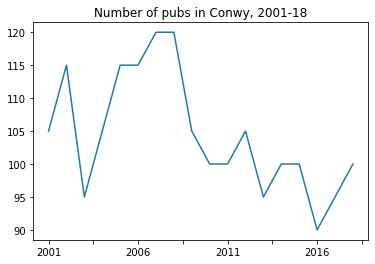

In [21]:
# plot a single column by time

years.Conwy.plot(title = 'Number of pubs in Conwy, 2001-18');

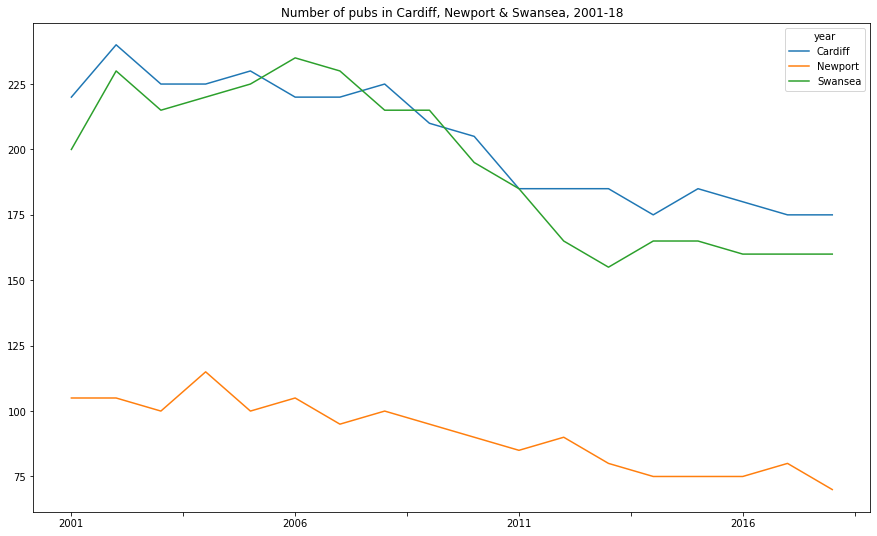

In [22]:
# plot a selection of columns

years[['Cardiff', 'Newport', 'Swansea']].plot(figsize = (15, 9), title = 'Number of pubs in Cardiff, Newport & Swansea, 2001-18');


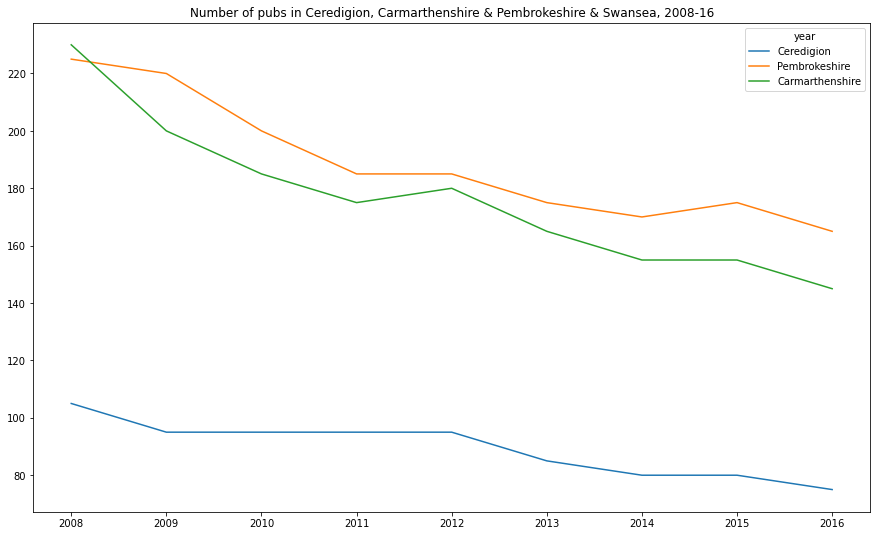

In [23]:
# plot a period and several areas

years['2008':'2016'][['Ceredigion', 'Pembrokeshire', 'Carmarthenshire']].plot(figsize = (15, 9), 
                                                                             title = 'Number of pubs in Ceredigion, Carmarthenshire & Pembrokeshire & Swansea, 2008-16');


<br><br>

## Scatterplot

> Wales pubs and population in 2018: gives a (dependent) variable to set against population: the number of pubs in local authorities

In [24]:
path = '/Users/aidanair/Documents/DATA/ALL_DATASETS/'
file = 'wales_all.csv'

pp = pd.read_csv(path + file)

In [25]:
pp[:3]

,area,pubs,pop
0,Isle of Anglesey,60,69961
1,Gwynedd,120,124178
2,Conwy,100,117181


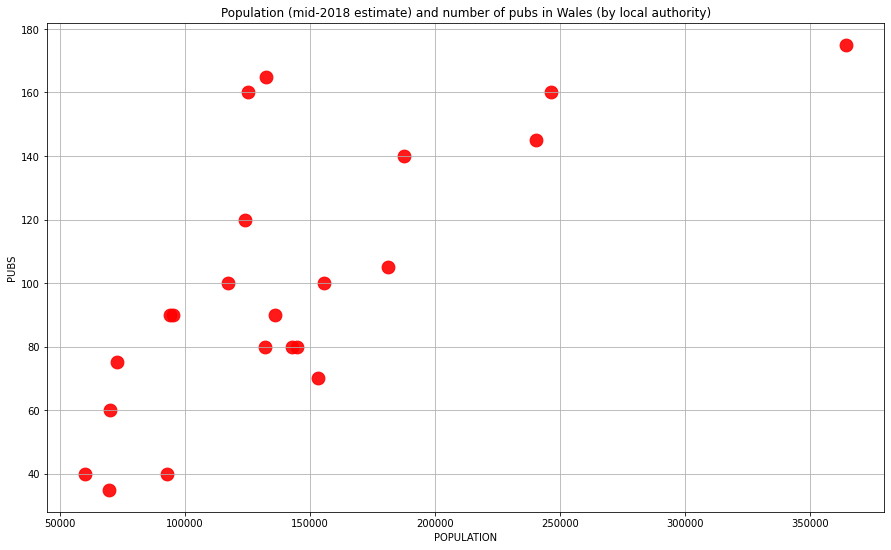

In [26]:
# scatterplot with dotsize (s) and dotcolour (c)

pp.plot(kind = 'scatter', 
        x = 'pop', 
        y = 'pubs', 
        figsize=(15,9),
        alpha = 0.9,
        title = ('Population (mid-2018 estimate) and number of pubs in Wales (by local authority)'),
        grid = True,
        s = 165, 
        c = 'r',
        xlabel = 'POPULATION',
        ylabel = 'PUBS')

# save to current directory
plt.savefig('wales_pop_pub.png')

<br><br>

## Histogram

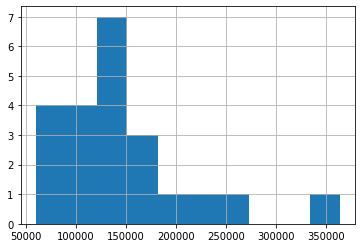

In [27]:
# histogram on a single column

pop.pop_eighteen.hist();

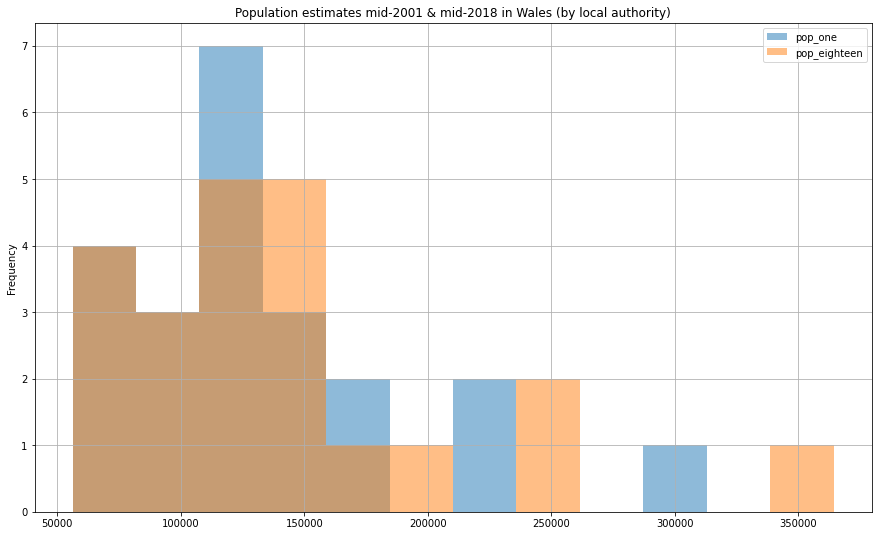

In [28]:
# histogram on both cols

pop[['pop_one','pop_eighteen']].plot(kind = 'hist', 
                                     alpha = 0.5, 
                                     figsize=(15,9),
                                     title = 'Population estimates mid-2001 & mid-2018 in Wales (by local authority)',
                                     grid = True,
                                     stacked = False,
                                     bins = 12,
                                     xlabel = 'Area', 
                                     ylabel = 'Population');


<br><br>

## Piechart

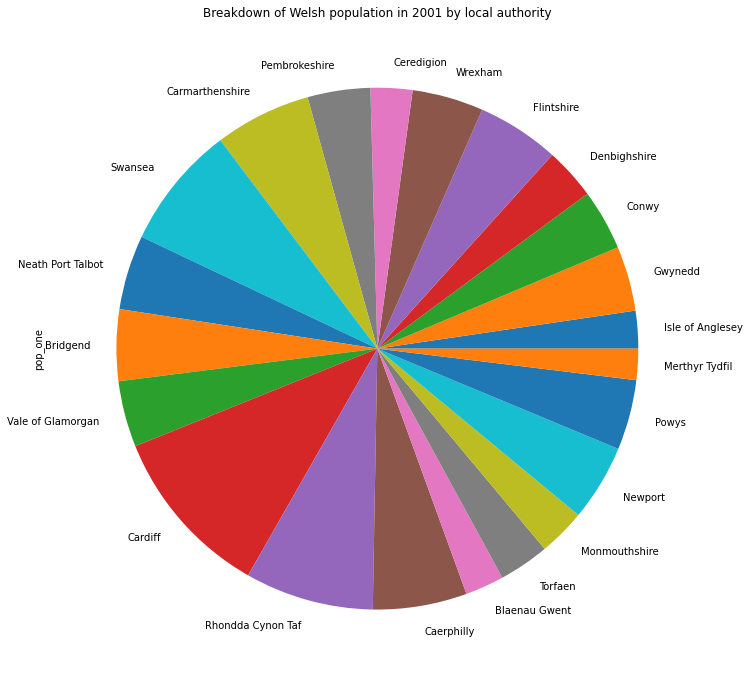

In [29]:
# piechart

pop['pop_one'].plot.pie(figsize=(20,12), title = 'Breakdown of Welsh population in 2001 by local authority');


<br><br>

## Boxplot

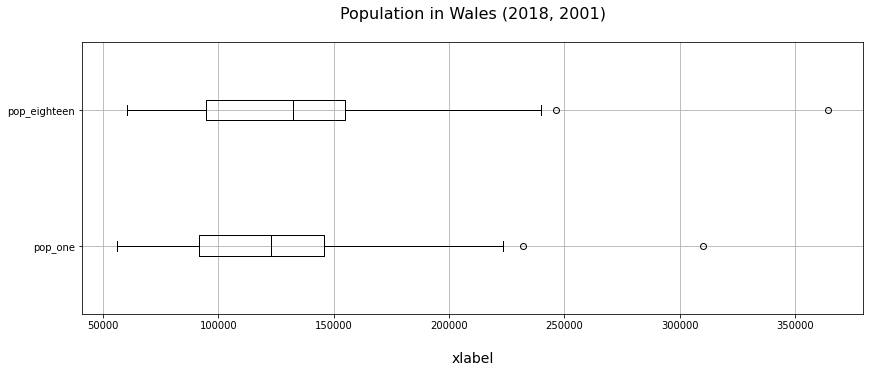

In [11]:
plt.figure(figsize=(14, 5))

pop.boxplot(vert=False, color = 'black')

plt.xlabel('\nxlabel', fontsize = 14)
# plt.legend(topleft)

plt.title('Population in Wales (2018, 2001)\n', fontsize = 16)

plt.show()


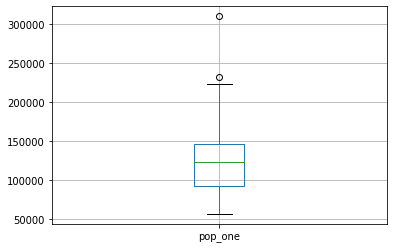

In [30]:
# box plots by single column...

pop.boxplot('pop_one'); 

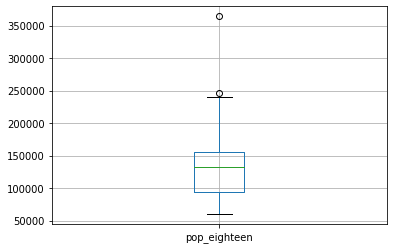

In [31]:
pop.boxplot('pop_eighteen');

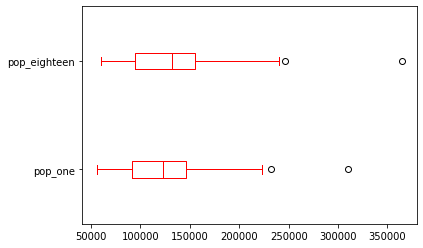

In [32]:
# ... and by df (with default vertical turned off) and colour selected

pop.boxplot(vert = False, grid = False, color = 'red');